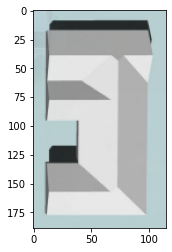

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
def show_img(path='roofgan1.png'):
    # Window name in which image is displayed
    window_name = 'image'
    image = cv.imread(path)
    plt.imshow(image)
    plt.show()
show_img()

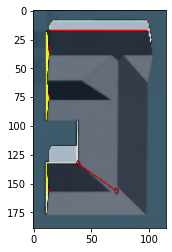

In [25]:
z = cv.imread('roofgan1_epoch8.png')
image = cv.imread(path)
plt.imshow(cv.resize(z, image.shape[:2][::-1]))

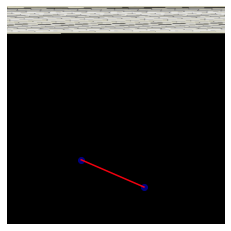

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt

def show_img(path='roofgan1.png'):
    # Read the image
    image = cv.imread(path)
    
    # Convert the image from BGR to RGB format
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    # Define points and score
    point1 = (141.1, 293.1)
    point2 = (261.1, 345.1)
    score = 0.9416178464889526

    # Additional points
    points = [
        {"x": 141.10000610351562, "y": 293.1000061035156, "score": (0, 0, 128)},
        {"x": 261.1000061035156, "y": 345.1000061035156, "score": (0, 0, 128)}
    ]
    
    # Convert the score to a matplotlib color
    color = (score, 0, 1-score)
    
    # Plot the image
    image_rgb.resize((416, 416, 3))
    
    plt.imshow(image_rgb)
    
    # Overlay the line with the derived color
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color=color)
    
    # Overlay additional points
    for point in points:
        normalized_score = tuple([x/255. for x in point["score"]])
        plt.scatter(point["x"], point["y"], color=normalized_score)

    # Display the plot
    plt.axis('off')  # hide the axis
    plt.show()

# Call the function to display the image
show_img()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

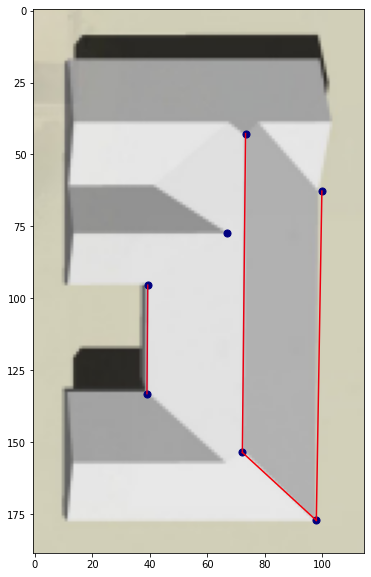

In [27]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Sample points and lines data
points = [
    (97.8882228411161, 177.23293546529916, (0, 0, 128)),
    (72.17908822573149, 153.60793546529916, (0, 0, 128)),
    (39.006011302654564, 133.16322392683762, (0, 0, 128)),
    (73.28485745650072, 42.752162768290596, (0, 0, 128)),
    (99.82331899496226, 62.74255084991455, (0, 0, 128)),
    (39.28245361034687, 95.45408931145302, (0, 0, 128)),
    (66.92668437957764, 77.28101238837608, (0, 0, 128)),
    # ... (Note: Some of the points are repeated in the provided list)
]

lines = [
    ((97.8882228411161, 177.23293546529916), (72.17908822573149, 153.60793546529916), 0.9636297225952148),
    ((97.8882228411161, 177.23293546529916), (99.82331899496226, 62.74255084991455), 0.9343641400337219),
    ((72.17908822573149, 153.60793546529916), (73.28485745650072, 42.752162768290596), 0.9264503717422485),
    ((39.006011302654564, 133.16322392683762), (39.28245361034687, 95.45408931145302), 0.8685444593429565),
    # ... (Note: Some of the lines are repeated in the provided list)
]

# Load the image
img_path = 'roofgan1.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plotting the image
plt.figure(figsize=(10, 10))
plt.imshow(img)

# Plotting the points
for x, y, color in points:
    plt.scatter(x, y, c=np.array(color)/255.0, s=50)  # s defines the marker size

# Plotting the lines
for pt1, pt2, score in lines:
    color = (score, 0, 1-score)  # Making it a colormap from blue to red based on the score
    plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color=color)

plt.show()


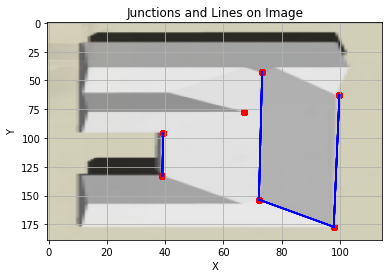

In [30]:
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_from_files(junction_file_path, line_file_path, img_path):
    # Extracting junctions
    junctions = []
    with open(junction_file_path, 'r') as f:
        for line in f:
            x = float(re.search(r'x:(.*?),', line).group(1))
            y = float(re.search(r'y:(.*?),', line).group(1))
            junctions.append((x, y))

    # Extracting lines
    lines = []
    with open(line_file_path, 'r') as f:
        for line in f:
            point1 = re.search(r'point1:\((.*?), (.*?)\)', line)
            point2 = re.search(r'point2:\((.*?), (.*?)\)', line)
            x1, y1 = float(point1.group(1)), float(point1.group(2))
            x2, y2 = float(point2.group(1)), float(point2.group(2))
            lines.append(((x1, y1), (x2, y2)))

    # Load and display image
    img = mpimg.imread(img_path)
    plt.imshow(img, aspect='auto')

    # Plot the junctions and lines on top of the image
    for (x1, y1), (x2, y2) in lines:
        plt.plot([x1, x2], [y1, y2], 'b-')
    for x, y in junctions:
        plt.scatter(x, y, c='red')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Junctions and Lines on Image")
    plt.grid(True)
    plt.show()

# Sample file paths, modify as necessary
junction_file_path = 'roofgan1_epoch12_junctions.txt'
line_file_path = 'roofgan1_epoch12_lines.txt'
img_path = 'roofgan1.png'
plot_from_files(junction_file_path, line_file_path, img_path)
